In [1]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

role = get_execution_role()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import matplotlib as plt

In [13]:
featuresdf = pd.read_csv('features_df.csv')
featuresdf.head()

,channelId,videoId,viewCount,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,titlePRON,titleSYM,titleSCONJ,titleINTJ,titlePART,titleCCONJ,subscriberCount,avgViewCount,humanCount,humanPresence
0,UCjOl2AUblVmg2rA_cRgZkFg,NXX338WY_Lw,184447.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7610000,2224636.0,0,0
1,UCjOl2AUblVmg2rA_cRgZkFg,dtHcdU2c71Y,217619.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7610000,2224636.0,0,0
2,UCjOl2AUblVmg2rA_cRgZkFg,vnrtWe-RAzg,437777.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,7610000,2224636.0,2,1
3,UCjOl2AUblVmg2rA_cRgZkFg,Ra1F0TsOCPs,191070.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,7610000,2224636.0,1,1
4,UCjOl2AUblVmg2rA_cRgZkFg,fXysipmTxcQ,572569.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,7610000,2224636.0,0,0


## Model 1: ANOVA test for categorical input variables

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that some features stand out as perhaps being more relevant than others, with much larger test statistic values.

In [14]:
catdf = featuresdf.drop(columns=['titleLen','subscriberCount','avgViewCount','humanCount'])
print(catdf.shape)
print(catdf.columns)
rows = len(catdf)

(405759, 57)
Index(['channelId', 'videoId', 'viewCount', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon',
       'Early Morning', 'Evening', 'Late Night', 'Morning', 'Night', 'Autumn',
       'Spring', 'Summer', 'Winter', 'AUTO & VEHICLES', 'COMEDY', 'EDUCATION',
       'ENTERTAINMENT', 'FILM', 'GAMING', 'HOW TO & STYLE', 'MADE FOR KIDS',
       'MUSIC', 'NEWS & POLITICS', 'NONPROFIT & ACTIVISM', 'PEOPLE & BLOGS',
       'PETS & ANIMALS', 'SCIENCE & TECHNOLOGY', 'SPORTS', 'TRAVEL',
       'Negative', 'Neutral', 'Positive', 'titlePROPN', 'titleDET', 'titleADJ',
       'titleVERB', 'titleNOUN', 'titleNUM', 'titleAUX', 'titlePUNCT',
       'titleADV', 'titleADP', 'titleX', 'titlePRON', 'titleSYM', 'titleSCONJ',
       'titleINTJ', 'titlePART', 'titleCCONJ', 'humanPresence'],
      dtype='object')


In [15]:
# Split into input(x) and output(y)

#retrieve numpy array & split
dataset= catdf.values
X = dataset[:,3:]
y = dataset[:,2]

#format all fields as string
X = X.astype(str)
y=y.astype('int64')
y=y.reshape((rows,1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (271858, 54) (271858, 1)
Test (133901, 54) (133901, 1)


In [16]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
print('FEATURE SELECTION DONE')
catscoredf = pd.DataFrame(list(fs.scores_))
catscoredf.to_csv('catscore_df.csv', index=False, header=True)
catscoredf.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

FEATURE SELECTION DONE


,0
0,0.063981
1,0.052212
2,0.015753
3,0.009671
4,0.082198


Feature 0: 0.063981
Feature 1: 0.052212
Feature 2: 0.015753
Feature 3: 0.009671
Feature 4: 0.082198
Feature 5: 0.072116
Feature 6: 0.086137
Feature 7: 0.198378
Feature 8: 0.021491
Feature 9: 0.142540
Feature 10: 0.091575
Feature 11: 0.027779
Feature 12: 0.068164
Feature 13: 0.157454
Feature 14: 0.211570
Feature 15: 0.189043
Feature 16: 0.180823
Feature 17: 0.000541
Feature 18: 0.000903
Feature 19: 0.004578
Feature 20: 0.002140
Feature 21: 0.012135
Feature 22: 0.000000
Feature 23: 0.007958
Feature 24: 0.000000
Feature 25: 0.000000
Feature 26: 2.051160
Feature 27: 0.079635
Feature 28: 0.000255
Feature 29: 0.000164
Feature 30: 0.004073
Feature 31: 0.182120
Feature 32: 0.000438
Feature 33: 0.046689
Feature 34: 1.596341
Feature 35: 0.220304
Feature 36: 1.246622
Feature 37: 0.005886
Feature 38: 0.016149
Feature 39: 0.009988
Feature 40: 0.043525
Feature 41: 0.004214
Feature 42: 0.000000
Feature 43: 0.003640
Feature 44: 0.000352
Feature 45: 0.004391
Feature 46: 0.000573
Feature 47: 0.002832
Fe

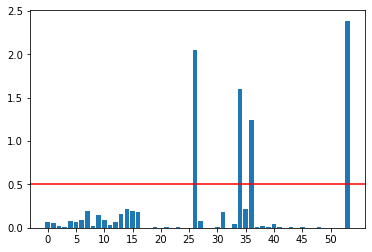

In [17]:
import numpy as np

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.figure(figsize=(15,10))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.xticks(np.arange(0,55,5))
pyplot.axhline(y=1, color='r', linestyle='-')
pyplot.title('Feature Importance Scores of categorical variables')
pyplot.xlabel('Feature Index Number')
pyplot.ylabel('Feature Importance Score')
pyplot.savefig('catbar.png')
pyplot.show()

In [18]:
index = []

for i in range(len(list(fs.scores_))):
    score = list(fs.scores_)[i]
    if score>0.5:
        print(str(i) + ": " + catdf.columns[i])

26: HOW TO & STYLE
34: SPORTS
36: Negative
53: titleINTJ


## Model 2: Pearson's Correlation test for numerical input variables
https://medium.com/analytics-vidhya/feature-selection-techniques-2614b3b7efcd

remove variables that are correlated to each other

In [44]:
numdf = featuresdf.loc[:,['viewCount','titleLen','subscriberCount','avgViewCount','humanCount']]
print(numdf.shape)
print(numdf.columns)

(405759, 5)
Index(['viewCount', 'titleLen', 'subscriberCount', 'avgViewCount',
       'humanCount'],
      dtype='object')


In [45]:
cor = numdf.corr()
cor

,viewCount,titleLen,subscriberCount,avgViewCount,humanCount
viewCount,1.000000,0.000177,0.091093,0.337469,-0.020841
titleLen,0.000177,1.000000,0.064078,0.022827,-0.016582
subscriberCount,0.091093,0.064078,1.000000,0.254701,-0.062342
avgViewCount,0.337469,0.022827,0.254701,1.000000,-0.079744
humanCount,-0.020841,-0.016582,-0.062342,-0.079744,1.000000


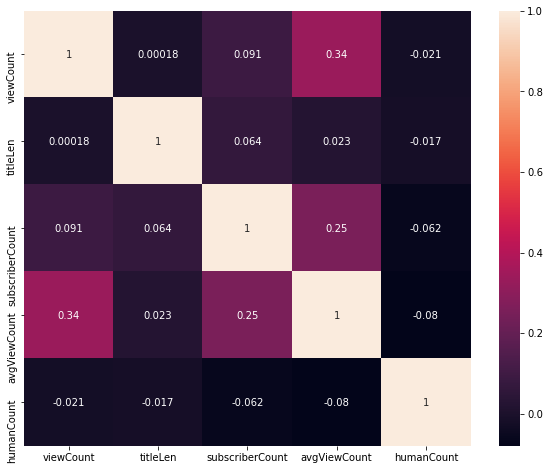

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

plt.savefig('heatmap.png')
plt.show()

In [47]:
numdf[['titleLen','subscriberCount']].corr()

,titleLen,subscriberCount
titleLen,1.000000,0.064078
subscriberCount,0.064078,1.000000


In [48]:
numdf[['titleLen','avgViewCount']].corr()

,titleLen,avgViewCount
titleLen,1.000000,0.022827
avgViewCount,0.022827,1.000000


In [49]:
numdf[['titleLen','humanCount']].corr()

,titleLen,humanCount
titleLen,1.000000,-0.016582
humanCount,-0.016582,1.000000


In [50]:
numdf[['subscriberCount','avgViewCount']].corr()

,subscriberCount,avgViewCount
subscriberCount,1.000000,0.254701
avgViewCount,0.254701,1.000000


In [51]:
numdf[['subscriberCount','humanCount']].corr()

,subscriberCount,humanCount
subscriberCount,1.000000,-0.062342
humanCount,-0.062342,1.000000


In [52]:
numdf[['avgViewCount','humanCount']].corr()

,avgViewCount,humanCount
avgViewCount,1.000000,-0.079744
humanCount,-0.079744,1.000000


## Model 3: ANOVA test for ALL input variables

In [19]:
alldf = featuresdf
print(alldf.shape)
print(alldf.columns)
rows = len(alldf)

(405759, 61)
Index(['channelId', 'videoId', 'viewCount', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon',
       'Early Morning', 'Evening', 'Late Night', 'Morning', 'Night', 'Autumn',
       'Spring', 'Summer', 'Winter', 'AUTO & VEHICLES', 'COMEDY', 'EDUCATION',
       'ENTERTAINMENT', 'FILM', 'GAMING', 'HOW TO & STYLE', 'MADE FOR KIDS',
       'MUSIC', 'NEWS & POLITICS', 'NONPROFIT & ACTIVISM', 'PEOPLE & BLOGS',
       'PETS & ANIMALS', 'SCIENCE & TECHNOLOGY', 'SPORTS', 'TRAVEL',
       'titleLen', 'Negative', 'Neutral', 'Positive', 'titlePROPN', 'titleDET',
       'titleADJ', 'titleVERB', 'titleNOUN', 'titleNUM', 'titleAUX',
       'titlePUNCT', 'titleADV', 'titleADP', 'titleX', 'titlePRON', 'titleSYM',
       'titleSCONJ', 'titleINTJ', 'titlePART', 'titleCCONJ', 'subscriberCount',
       'avgViewCount', 'humanCount', 'humanPresence'],
      dtype='object')


In [20]:
# Split into input(x) and output(y)

#retrieve numpy array & split
dataset= alldf.values
X = dataset[:,3:]
y = dataset[:,2]

#format all fields as string
X = X.astype(str)
y=y.astype('int64')
y=y.reshape((rows,1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (271858, 58) (271858, 1)
Test (133901, 58) (133901, 1)


In [21]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
print('FEATURE SELECTION DONE')
allscoredf = pd.DataFrame(list(fs.scores_))
allscoredf.to_csv('allscore_df.csv', index=False, header=True)
allscoredf.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

FEATURE SELECTION DONE


,0
0,0.061123
1,0.053195
2,0.015314
3,0.007945
4,0.083718


Feature 0: 0.061123
Feature 1: 0.053195
Feature 2: 0.015314
Feature 3: 0.007945
Feature 4: 0.083718
Feature 5: 0.073411
Feature 6: 0.082686
Feature 7: 0.193197
Feature 8: 0.022390
Feature 9: 0.142687
Feature 10: 0.093379
Feature 11: 0.027605
Feature 12: 0.062872
Feature 13: 0.154480
Feature 14: 0.206763
Feature 15: 0.187820
Feature 16: 0.179872
Feature 17: 0.000397
Feature 18: 0.000000
Feature 19: 0.001589
Feature 20: 0.002956
Feature 21: 0.015832
Feature 22: 0.000000
Feature 23: 0.003377
Feature 24: 0.000000
Feature 25: 0.000000
Feature 26: 2.041418
Feature 27: 0.073173
Feature 28: 0.000000
Feature 29: 0.001595
Feature 30: 0.000722
Feature 31: 0.181007
Feature 32: 0.000000
Feature 33: 0.156247
Feature 34: 0.042901
Feature 35: 1.582291
Feature 36: 0.218732
Feature 37: 1.244789
Feature 38: 0.008676
Feature 39: 0.017713
Feature 40: 0.004064
Feature 41: 0.046059
Feature 42: 0.001063
Feature 43: 0.000000
Feature 44: 0.000000
Feature 45: 0.002421
Feature 46: 0.002807
Feature 47: 0.000000
Fe

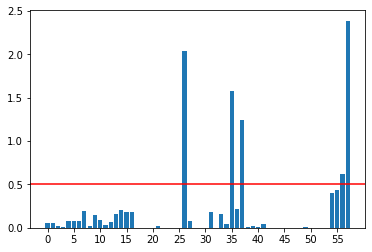

In [22]:
import numpy as np

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
pyplot.figure(figsize=(15,10))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.xticks(np.arange(0,60,5))
pyplot.axhline(y=1, color='r', linestyle='-')
pyplot.title('Feature Importance Scores of all variables')
pyplot.xlabel('Feature Index Number')
pyplot.ylabel('Feature Importance Score')
pyplot.savefig('allbar.png')
pyplot.show()

In [23]:
index = []

for i in range(len(list(fs.scores_))):
    score = list(fs.scores_)[i]
    if score>1:
        print(str(i) + ": " + alldf.columns[i])

26: HOW TO & STYLE
35: TRAVEL
37: Negative
56: titleCCONJ
57: subscriberCount
